In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("Teams.csv")
df.head()

## This is a model to predict future baseball records for each of the 30 teams for the next 30 seasons, for readability, I will not show the code of the results because it was very unorganzied in the notebook, but I did show each seasons result in Excel, which I uploaded as screenshot in this notebook via a ARIMA (moving average) model. I also made another model to generate/ mock the playoffs. This model can be best described as a head and tails like scenario but I gave more weight to the teams that had a better record.

In [ ]:
ALCentral = df[(df['franchID'] == 'DET') |
               (df['franchID'] == 'CHW') |
               (df['franchID'] == 'CLE') |
               (df['franchID'] == 'MIN') |
               (df['franchID'] == 'KCR')]

ALEast = df[(df['franchID'] == 'NYY') |
            (df['franchID'] == 'BOS') |
            (df['franchID'] == 'TOR') |
            (df['franchID'] == 'TBD') |
            (df['franchID'] == 'BAL')]

ALWest = df[(df['franchID'] == 'HOU') |
            (df['franchID'] == 'OAK') |
            (df['franchID'] == 'SEA') |
            (df['franchID'] == 'ANA') |
            (df['franchID'] == 'TEX')]

NLCentral = df[(df['franchID'] == 'MIL') |
               (df['franchID'] == 'STL') |
               (df['franchID'] == 'CIN') |
               (df['franchID'] == 'CHC') |
               (df['franchID'] == 'PIT')]

NLEast = df[(df['franchID'] == 'ATL') |
            (df['franchID'] == 'NYM') |
            (df['franchID'] == 'PHI') |
            (df['franchID'] == 'WSN') |
            (df['franchID'] == 'FLA')]

NLWest = df[(df['franchID'] == 'LAD') |
            (df['franchID'] == 'SFG') |
            (df['franchID'] == 'SDP') |
            (df['franchID'] == 'COL') |
            (df['franchID'] == 'ARI')]


In [ ]:
AL = pd.concat([ALCentral, ALEast, ALWest])
NL = pd.concat([NLCentral,NLEast,NLWest])

MLB = pd.concat([AL,NL])


In [ ]:
team_w = MLB.groupby(['yearID', 'franchID'])['W'].sum()


for team in team_w.index.get_level_values('franchID').unique():
    
    team_data = team_w.loc[:, team]
  
    model = ARIMA(team_data, order=(2,1,2))
    model_fit = model.fit()
    
    future = 8
    forecast = model_fit.get_forecast(steps=future)
    predicted_values = forecast.predicted_mean
    print(f"Team: {team}")
    print("Predicted Values:")
    print(predicted_values)

In [ ]:
import random

def simulate_playoff_series(team1, team2, num_simulations, team1_weight=1.0, team2_weight=1.0):
    team1_wins = 0
    team2_wins = 0

    for _ in range(num_simulations):
        adjusted_win_prob = team1_weight / (team1_weight + team2_weight)
        random_num = random.random()

        if random_num < adjusted_win_prob:
            team1_wins += 1
        else:
            team2_wins += 1

    return team1_wins, team2_wins


num_simulations = 7
team1 = 'guardians'
team2 = 'braves'
team1_weight = 1.09
team2_weight = 1.0

team1_wins, team2_wins = simulate_playoff_series(team1, team2, num_simulations, team1_weight, team2_weight)


Here are the results for the regular seasons - 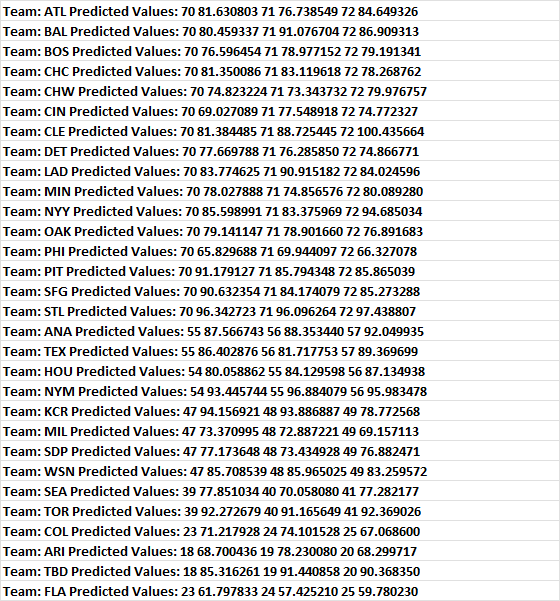

2016 Summarized and Post-season - 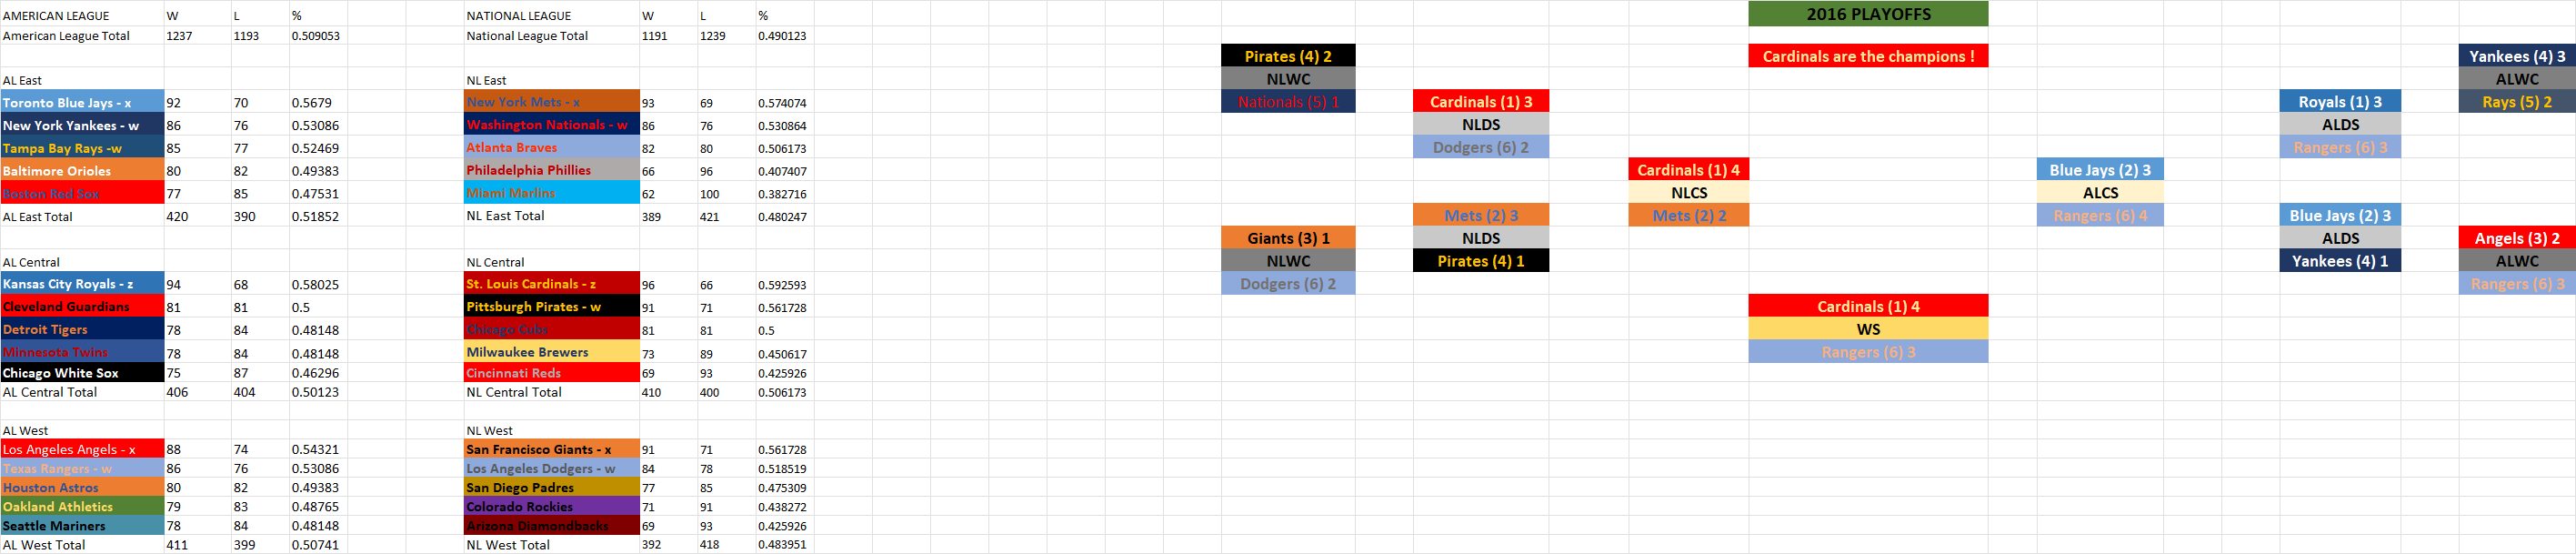

2017 Summarized and post-season - 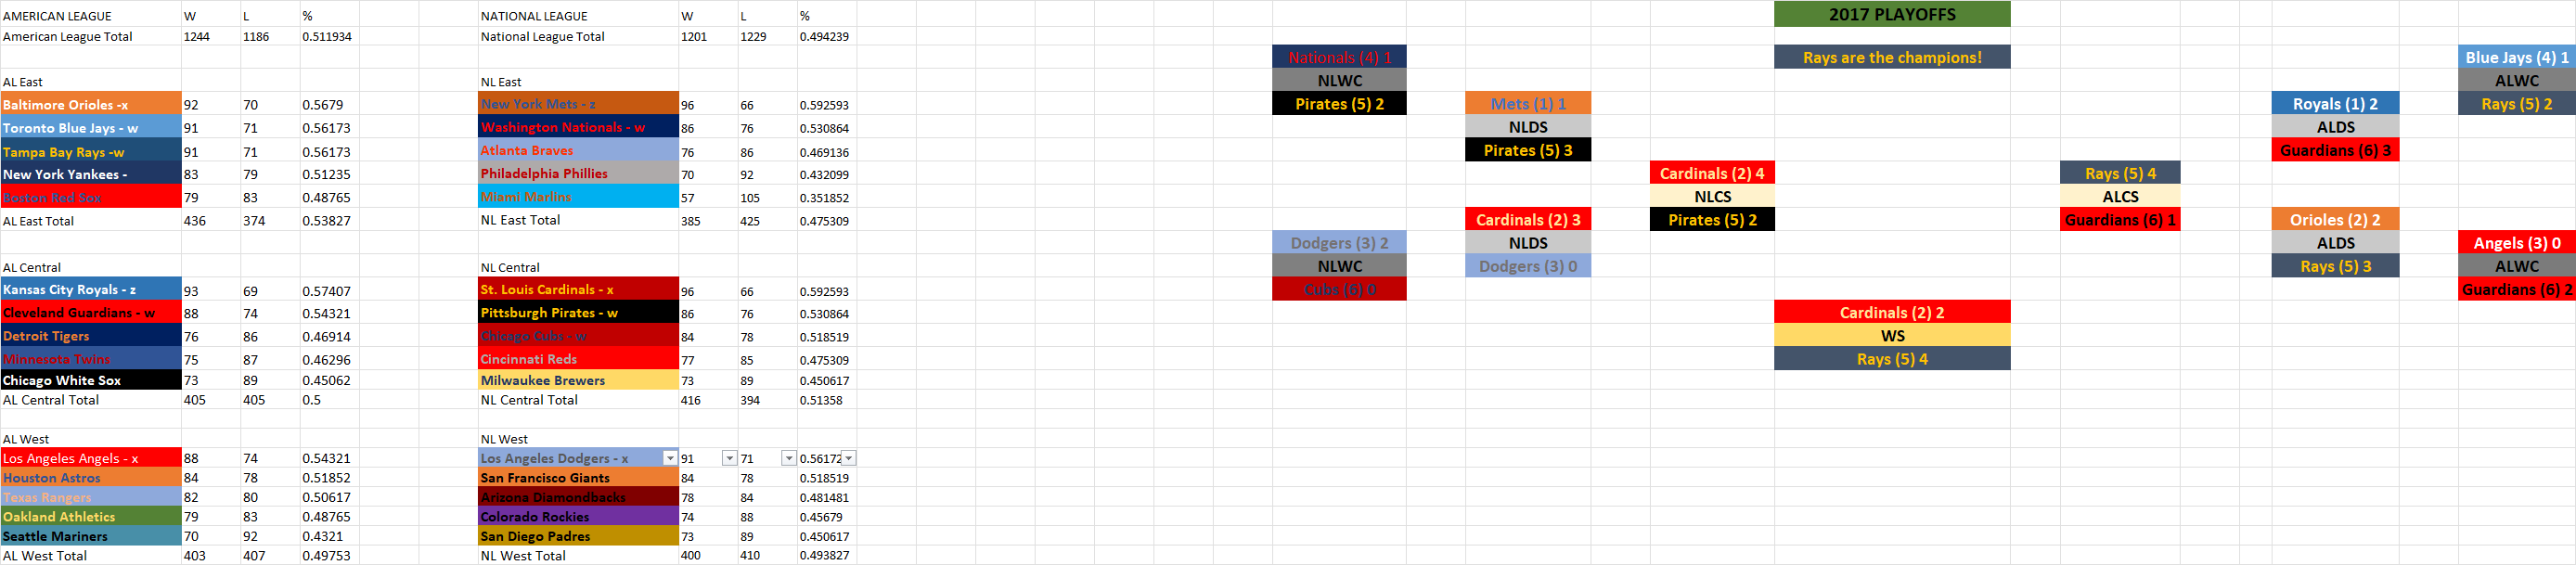

2018 Summarized and post-season - 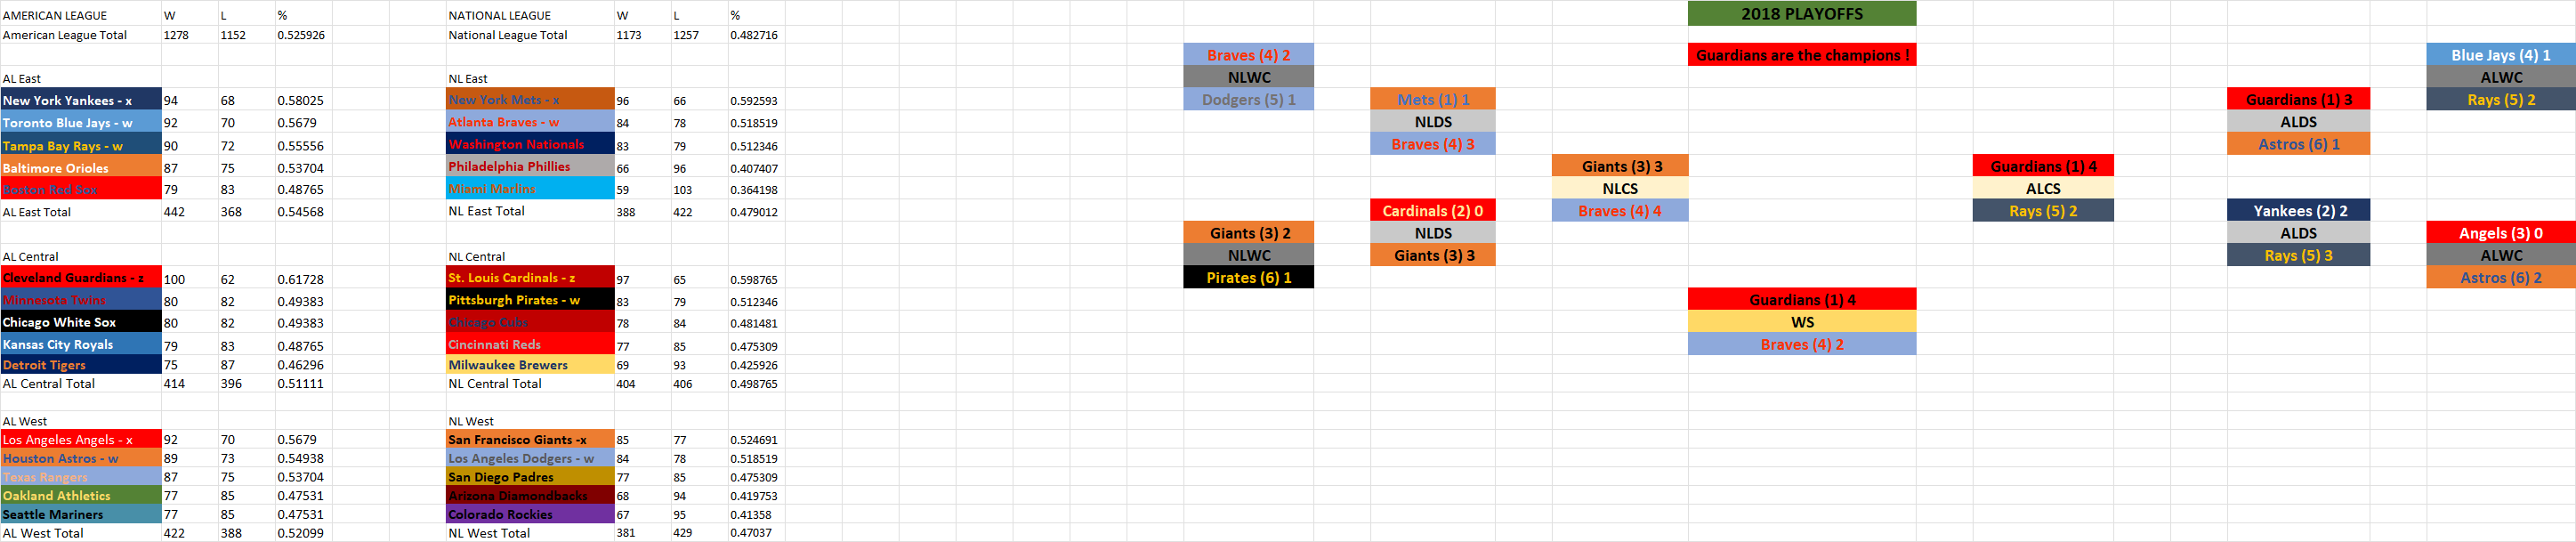